In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_santander():
    # import the Santander customer satisfaction dataset from Kaggle
    X_train = pd.read_csv('../../data/train.csv')
    y_train = X_train.TARGET
    X_train = X_train.drop(columns=['TARGET'])

    X_test = pd.read_csv('../../data/test.csv')
    
    return X_train, y_train, X_test

X_train, y_train, X_test = load_santander()

# check shape of training and test sets
print(f'training shape : {X_train.shape} Test shape : {X_test.shape} y_train shape : {y_train.shape}')

training shape : (76020, 370) Test shape : (75818, 370) y_train shape : (76020,)


In [3]:
# Removing Constant Features
from sklearn.feature_selection import VarianceThreshold

In [4]:
# fit finds the features with zero variance
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)
X1 = X_train.drop(columns=X_train.columns[~sel.get_support()])
X1t = X_test.drop(columns=X_test.columns[~sel.get_support()])

In [5]:
print(f'New sahape {X1.shape} number of feature removed {X_train.shape[1] - X1.shape[1]}')

New sahape (76020, 336) number of feature removed 34


In [30]:
# Removing Quasi-constant: Quasi-constant features are those that show the same value for the great majority of the observations of the dataset.

In [6]:
sel_quasi = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately
sel_quasi.fit(X1)
X2 = X1.drop(columns=X1.columns[~sel_quasi.get_support()])
X2t = X1t.drop(columns=X1t.columns[~sel_quasi.get_support()])

In [7]:
print(f'New sahape {X2.shape} number of feature removed {X1.shape[1] - X2.shape[1]}')

New sahape (76020, 273) number of feature removed 63


In [7]:
# SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

In [8]:
sel_kbest = SelectKBest(f_classif, k=150)
sel_kbest.fit(X2, y_train)
X3 = X2.drop(columns=X2.columns[~sel_kbest.get_support()])
X3t = X2t.drop(columns=X2t.columns[~sel_kbest.get_support()])

In [9]:
X3.shape

(76020, 150)

In [11]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [12]:
sel_kbest = SelectKBest(mutual_info_classif, k=50)
sel_kbest.fit(X3, y_train)
X4 = X3.drop(columns=X3.columns[~sel_kbest.get_support()])
X4t = X3t.drop(columns=X3t.columns[~sel_kbest.get_support()])

In [14]:
X4.shape

(76020, 50)

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X4, y_train, test_size=0.33, random_state=42)

In [18]:
svc = SVC(random_state=42)
clf = svc.fit(X_train, y_train)

In [30]:
clf.score(X_test, y_test)

0.9604974688085463

In [31]:
from sklearn.metrics import roc_auc_score

In [32]:
pred = clf.predict(X_train)

In [33]:
roc_auc_score(y_train, pred)

0.5

In [36]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix

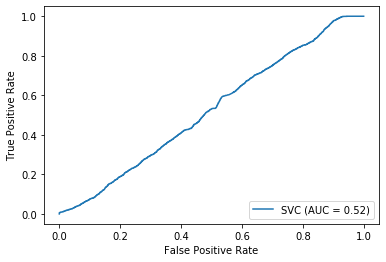

In [35]:
svc_disp = plot_roc_curve(clf, X_train, y_train)
plt.show()

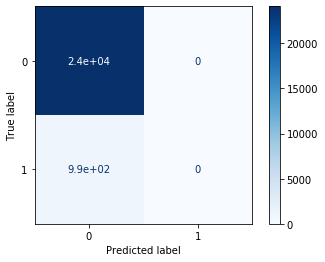

In [40]:
plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=[0 ,1],
                                 cmap=plt.cm.Blues)

In [45]:
y_test.value_counts()/len(y_test)

0    0.960497
1    0.039503
Name: TARGET, dtype: float64